<a href="https://colab.research.google.com/github/BharadwajDinesh/ML-Lab/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Dataset
Dataset loaded successfully.
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
--------------------------------------------------
## 2. Exploratory Data Analysis (EDA)
Shape of the dataset: (150, 5)

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width

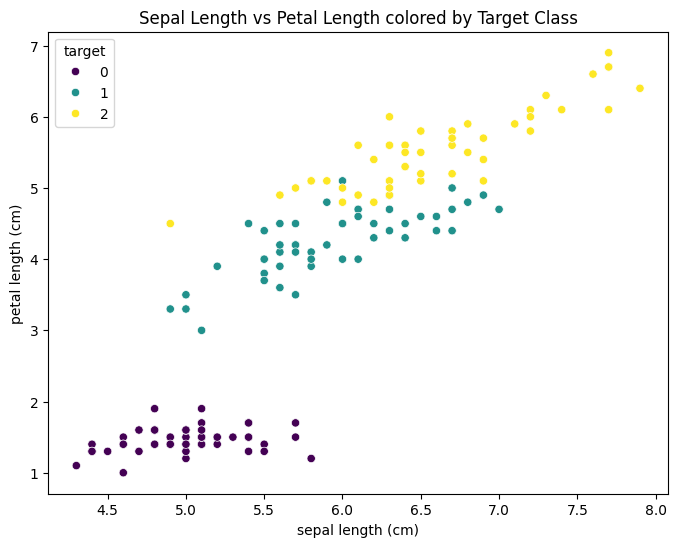

--------------------------------------------------
## 3. Declare Feature Vector (X) and Target Variable (y)
Features (X) shape: (150, 4)
Target (y) shape: (150,)
--------------------------------------------------
## 4. Split Data into Training and Test Set
X_train shape: (105, 4)
X_test shape: (45, 4)
--------------------------------------------------
## 5. Feature Scaling (Standardization)
Features have been scaled.
--------------------------------------------------
## 6. Run SVM with **Default Hyperparameters (RBF Kernel)**

--- Running SVM with **RBF Kernel** ---

8. Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]

9. Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.93      0.90        15
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg   

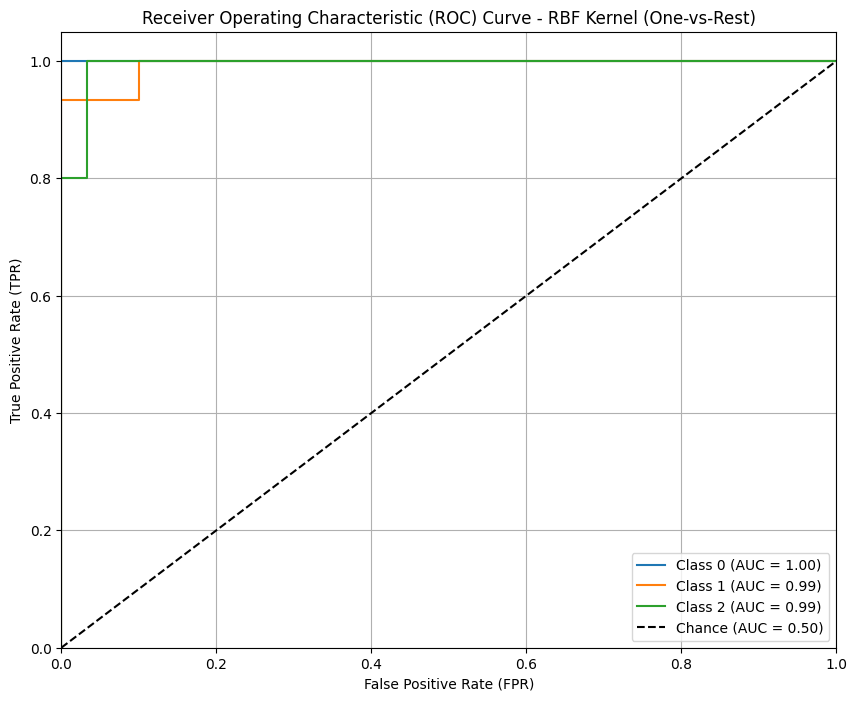

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    roc_auc_score,
)

# ---------------------------------
## 1. Import Dataset (Iris Example)
# ---------------------------------
print("## 1. Import Dataset")
iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                    columns=iris['feature_names'] + ['target'])
print("Dataset loaded successfully.")
print(data.head())
print("-" * 50)

# ---------------------------------
## 2. Exploratory Data Analysis (EDA)
# ---------------------------------
print("## 2. Exploratory Data Analysis (EDA)")
print(f"Shape of the dataset: {data.shape}")
print("\nData Information:")
print(data.info())
print("\nTarget Variable Distribution:")
# Note: Target is float in the DataFrame, convert for visualization
data['target'] = data['target'].astype(int)
print(data['target'].value_counts())
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='target', data=data, palette='viridis')
plt.title('Sepal Length vs Petal Length colored by Target Class')
plt.show()
print("-" * 50)

# ---------------------------------
## 3. Declare Feature Vector and Target Variable
# ---------------------------------
print("## 3. Declare Feature Vector (X) and Target Variable (y)")
X = data.drop('target', axis=1)
y = data['target']
print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("-" * 50)

# ---------------------------------
## 4. Split Data into Separate Training and Test Set
# ---------------------------------
print("## 4. Split Data into Training and Test Set")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print("-" * 50)

# ---------------------------------
## 5. Feature Scaling
# ---------------------------------
print("## 5. Feature Scaling (Standardization)")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Features have been scaled.")
print("-" * 50)


def train_evaluate_svm(X_train, X_test, y_train, y_test, kernel_type, C=1.0, gamma='scale'):
    """Trains an SVM model and prints confusion matrix and classification report."""
    print(f"\n--- Running SVM with **{kernel_type.upper()} Kernel** ---")

    # 6. Run SVM
    if kernel_type == 'poly':
        # Default degree is 3, C is 1.0
        svm_model = SVC(kernel=kernel_type, C=C, random_state=42, probability=True)
    else:
        svm_model = SVC(kernel=kernel_type, C=C, gamma=gamma, random_state=42, probability=True)

    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    y_prob = svm_model.predict_proba(X_test)

    # 8. Confusion Matrix
    print("\n8. Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # 9. Classification Metrics
    print("\n9. Classification Report:")
    report = classification_report(y_test, y_pred)
    print(report)

    # 10. ROC - AUC (One-vs-Rest for multi-class)
    print("\n10. ROC - AUC (One-vs-Rest):")
    # For multi-class (Iris has 3 classes), we calculate ROC-AUC using the One-vs-Rest approach.
    roc_auc_scores = roc_auc_score(y_test, y_prob, multi_class='ovr')
    print(f"Overall ROC-AUC (One-vs-Rest): {roc_auc_scores:.4f}")

    return svm_model, y_prob


# ---------------------------------
## 6. Run SVM with default hyperparameters (RBF Kernel)
# ---------------------------------
print("## 6. Run SVM with **Default Hyperparameters (RBF Kernel)**")
svm_rbf, y_prob_rbf = train_evaluate_svm(X_train_scaled, X_test_scaled, y_train, y_test, kernel_type='rbf')
print("=" * 70)

# ---------------------------------
## 7. Run SVM with Linear Kernel
# ---------------------------------
print("## 7. Run SVM with **Linear Kernel**")
svm_linear, y_prob_linear = train_evaluate_svm(X_train_scaled, X_test_scaled, y_train, y_test, kernel_type='linear')
print("=" * 70)

# ---------------------------------
## 8. Run SVM with Polynomial Kernel
# ---------------------------------
print("## 8. Run SVM with **Polynomial Kernel** (degree=3)")
svm_poly, y_prob_poly = train_evaluate_svm(X_train_scaled, X_test_scaled, y_train, y_test, kernel_type='poly')
print("=" * 70)

# ---------------------------------
## 9. Run SVM with Sigmoid Kernel
# ---------------------------------
print("## 9. Run SVM with **Sigmoid Kernel**")
svm_sigmoid, y_prob_sigmoid = train_evaluate_svm(X_train_scaled, X_test_scaled, y_train, y_test, kernel_type='sigmoid')
print("=" * 70)

# ---------------------------------
## 10. Visualizing ROC Curves (for RBF Kernel)
# ---------------------------------
print("\n## 10. Visualizing ROC Curves for RBF Kernel")
n_classes = len(np.unique(y))
y_test_binarized = pd.get_dummies(y_test).values  # Binarize the target variable

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob_rbf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(
        fpr,
        tpr,
        label=f'Class {i} (AUC = {roc_auc:.2f})',
    )

plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - RBF Kernel (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print("=" * 70)